# Projet Forêt : Méthode numérique

In [111]:
import numpy as np
import matplotlib.pyplot as plt

## On a le système suivant :

$$\frac{dH}{dt} = \frac{-aHF}{b + cH + H^2} + (1-\delta)mF $$
$$\frac{dF}{dt} = \frac{aHF}{b + cH + H^2} - mF$$

### On essaie d'étudier avec la méthode de Runge Kutta 4 la stabilité de certains points critiques

In [114]:
#Paramètres
a = 0.031
b = 8*10**(-6)
c = 1.13
delta = 0.2 #biomasse crée par la terre mais qui vient pas des feuilles mortes
m = 0.027
H0 = (a - c*m)/(2*m)

In [116]:
def fsysteme(t, u, delta):
    ### BEGIN SOLUTION
    res = np.zeros(2)
    H = u[0]
    F = u[1]
    res[0] = -a*H*F/(b+c*H+H**2) + (1-delta)*m*F #dH/dt
    res[1] = a*H*F/(b+c*H+H**2) -m*F #dF/dt
    return res

On utilise Runge Kutta 4

In [118]:
def RK4(f,t,mu0, delta):
    ### BEGIN SOLUTION
    u = np.array([mu0]*t.size,dtype=float)
    for i in range(1,t.size):
        dt = t[i] - t[i-1]
        p1 = f(t[i-1],u[i-1], delta)
        p2 = f(t[i-1] + dt/2, u[i-1] + dt/2*p1, delta)
        p3 = f(t[i-1] + dt/2, u[i-1] + dt/2*p2, delta)
        p4 = f(t[i-1] + dt  , u[i-1] + dt  *p3, delta)
        u[i] = u[i-1] + dt/6*(p1 + 2*p2 + 2*p3 + p4)
    return u

### On effectue le Portrait de Phase pour les conditions initiales suivants : 

$$H_0 = 155.25$$
$$F_0 = 148.4$$

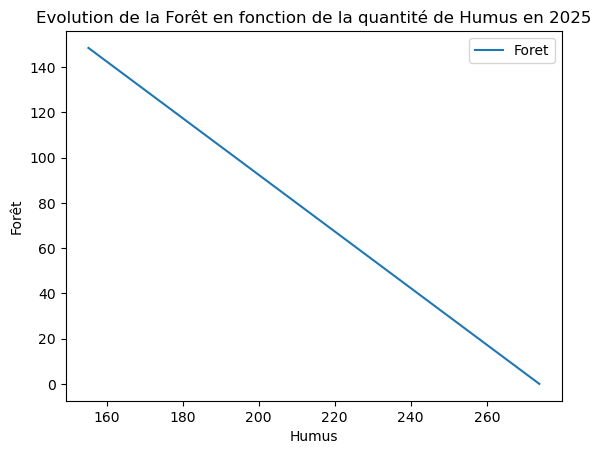

In [190]:
delta = 0.2
H0_ = 155.25 #En 2025
F0_ = 148.4 #En 2025
time = np.linspace(0,1000,10000)
u0 = np.array([H0_,F0_])
solRK4 = RK4(fsysteme,time,u0, delta)

plt.plot(solRK4[:,0], solRK4[:,1], label="Foret")
plt.xlabel("Humus")
plt.ylabel("Forêt")
plt.legend()
plt.title("Evolution de la Forêt en fonction de la quantité de Humus en 2025")
plt.show()

#### Evolution en fonction du temps de la Forêt

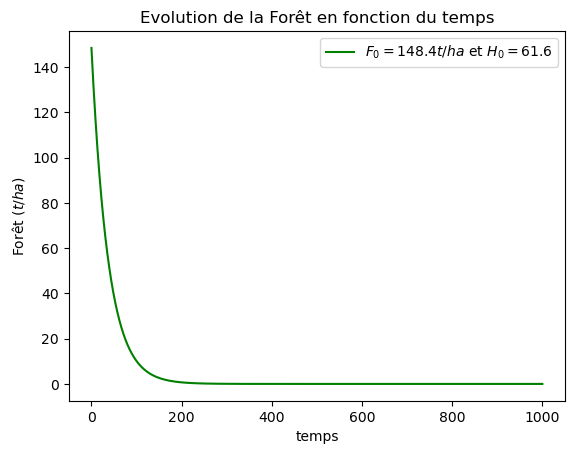

In [192]:
plt.plot(time, solRK4[:,1], label="$F_0 = 148.4 t/ha$ et $H_0 = 61.6$", color = "g")
plt.xlabel("temps")
plt.title("Evolution de la Forêt en fonction du temps")
plt.ylabel("Forêt $(t/ha)$")
plt.legend()
plt.show()

#### Evolution en fonction du temps de la quantité de Humus

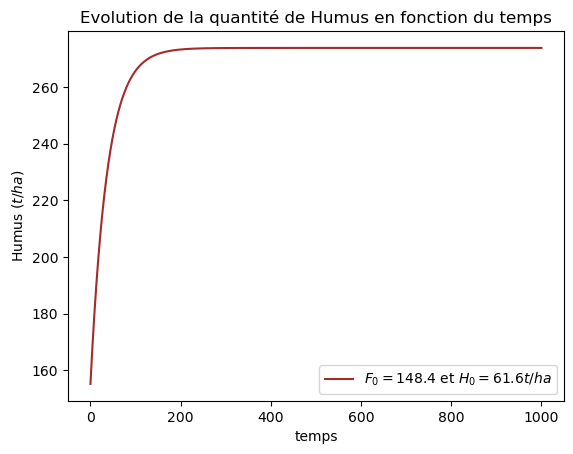

In [194]:
plt.plot(time, solRK4[:,0], label="$F_0 = 148.4$ et $H_0 = 61.6 t/ha$", color = "brown")
plt.xlabel("temps")
plt.title("Evolution de la quantité de Humus en fonction du temps")
plt.ylabel("Humus $(t/ha)$")
plt.legend()
plt.show()

### On effectue maintenant le Portrait de Phase pour les conditions initiales suivants où nous n'avons pas pu conclure : 

$$ \delta = 0$$
$$H_1 = \frac{(a-mc) - \sqrt{(a-mc)^2-4m^2b}}{2m} $$
$$ F \neq 0$$

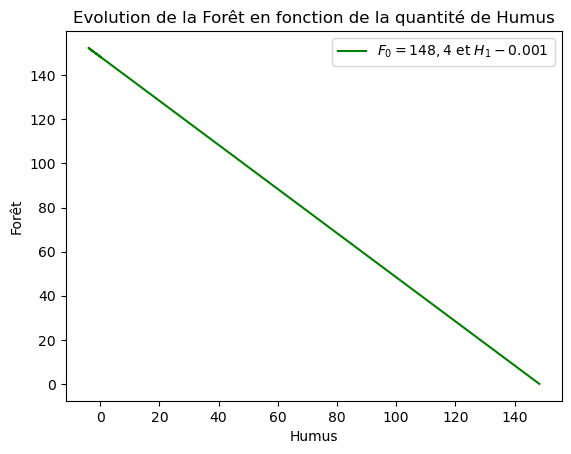

In [198]:
delta = 0
H1 = ((a - m*c) - np.sqrt((a - m*c)**2 - 4*m**2*b))/(2*m)
u0_2 = np.array([H1-0.001,F0_])
solRK4_2 = RK4(fsysteme,time,u0_2, delta)

plt.plot(solRK4_2[:,0], solRK4_2[:,1], label="$F_0 = 148,4$ et $H_1-0.001$ ", color = 'g')
plt.xlabel("Humus")
plt.ylabel("Forêt")
plt.legend()
plt.title("Evolution de la Forêt en fonction de la quantité de Humus")
plt.show()

### On effectue maintenant le Portrait de Phase pour les conditions initiales suivantes où nous n'avons également pas pu conclure : 

$$ \delta = 0$$
$$H_0=\frac{a-cm}{2m}$$
$$ F \neq 0$$

en prenant une valeure proche de $H_0$ car nous sommes dans une situation qui n'est pas stable

#### Portrait de phase

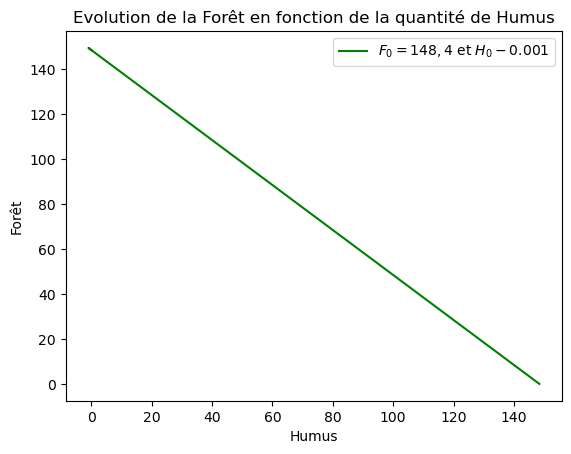

0.009074074074074154

In [171]:
delta = 0
H0 = (a - m*c)/(2*m)
u0_3 = np.array([H0-0.001,F0_])
solRK4_3 = RK4(fsysteme,time,u0_3, delta)

plt.plot(solRK4_3[:,0], solRK4_3[:,1], label="$F_0 = 148,4$ et $H_0-0.001$", color = 'g')
plt.xlabel("Humus")
plt.ylabel("Forêt")
plt.legend()
plt.title("Evolution de la Forêt en fonction de la quantité de Humus")
plt.show()

H0

#### Evolution en fonction du temps de la quantité de Humus

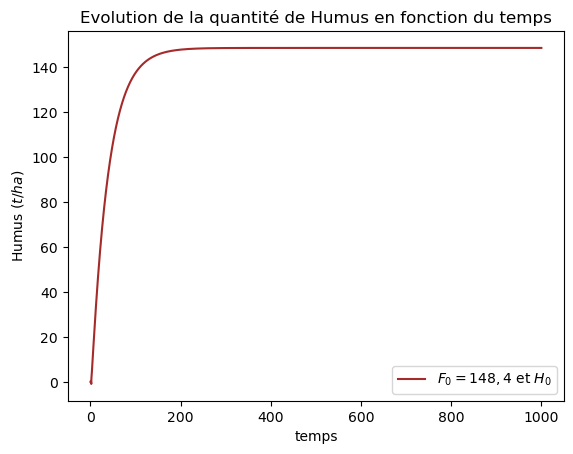

In [174]:
plt.plot(time, solRK4_3[:,0], label="$F_0 = 148,4$ et $H_0$", color = "brown")
plt.xlabel("temps")
plt.title("Evolution de la quantité de Humus en fonction du temps")
plt.ylabel("Humus $(t/ha)$")
plt.legend()
plt.show()

### ETUDE DE LA STABILITE DES POINTS CRITIQUES 


#### Cas 1 : $\delta =0 $ et $F = 0$

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\748582461.py:6: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(sol_cas1[:,0], sol_cas1[:,1], color = "r", label="$\delta = 0$ et $F = 0$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\748582461.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas1[:,0], label="$\delta = 0$ et $F = 0$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\748582461.py:21: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas1[:,1], label="$\delta = 0$ et $F = 0$")


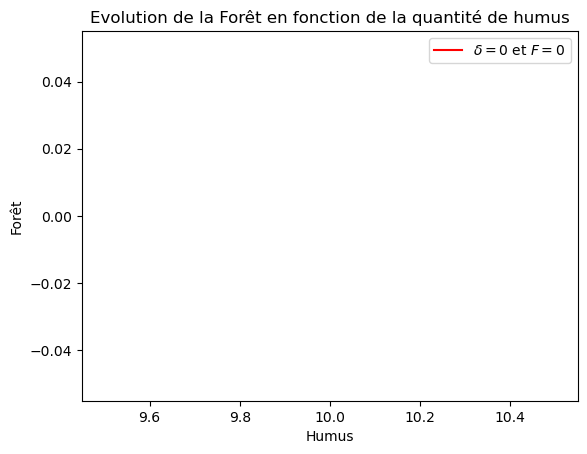

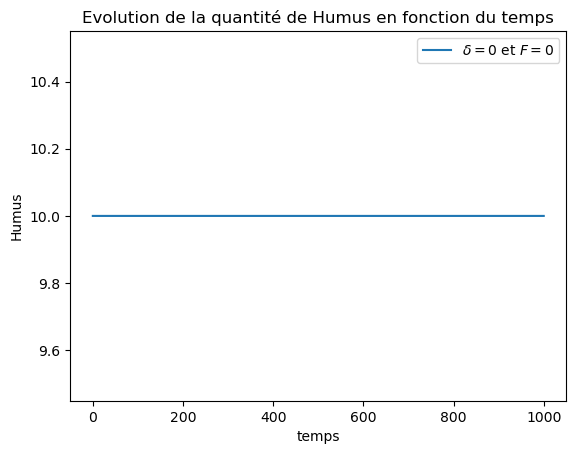

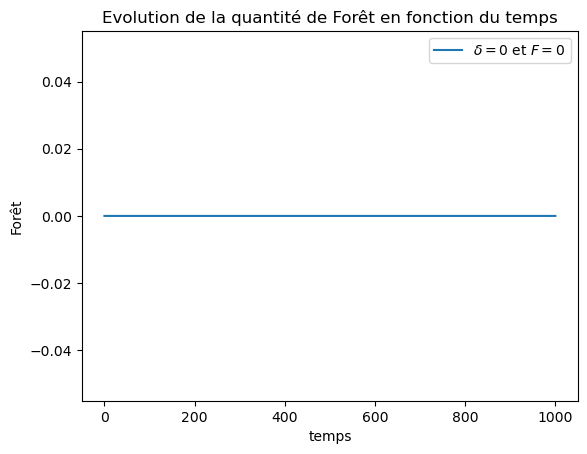

In [176]:
u01 = np.array([10,0])
delta = 0

sol_cas1 = RK4(fsysteme,time,u01,delta)

plt.plot(sol_cas1[:,0], sol_cas1[:,1], color = "r", label="$\delta = 0$ et $F = 0$")
plt.xlabel("Humus")
plt.ylabel("Forêt")
plt.title("Evolution de la Forêt en fonction de la quantité de humus")
plt.legend()
plt.show()

plt.plot(time, sol_cas1[:,0], label="$\delta = 0$ et $F = 0$")
plt.xlabel("temps")
plt.ylabel("Humus")
plt.title("Evolution de la quantité de Humus en fonction du temps")
plt.legend()
plt.show()


plt.plot(time, sol_cas1[:,1], label="$\delta = 0$ et $F = 0$")
plt.xlabel("temps")
plt.ylabel("Forêt")
plt.title("Evolution de la quantité de Forêt en fonction du temps")
plt.legend()
plt.show()



#### Cas 2 : $\delta =0 $ et $F = 0.01$

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\1633603720.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(sol_cas2[:,0], sol_cas2[:,1], color = "r", label="$\delta = 0$ et $F0 = 0.01$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\1633603720.py:13: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas2[:,0], label="$\delta = 0$ et $F = 0.01$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\1633603720.py:21: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas2[:,1], label="$\delta = 0$ et $F = 0.01$")


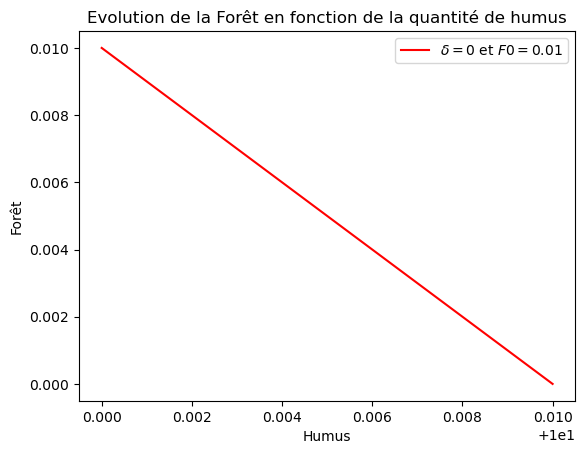

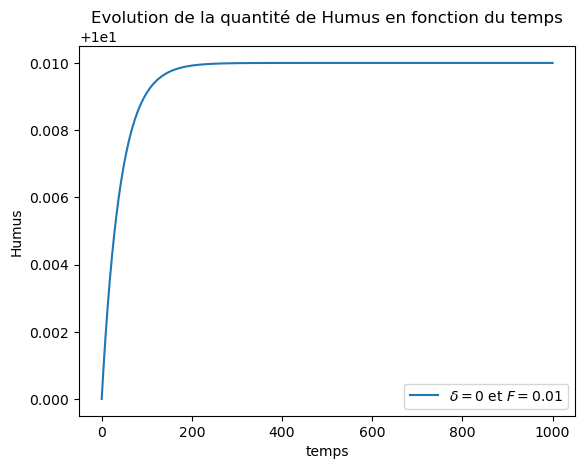

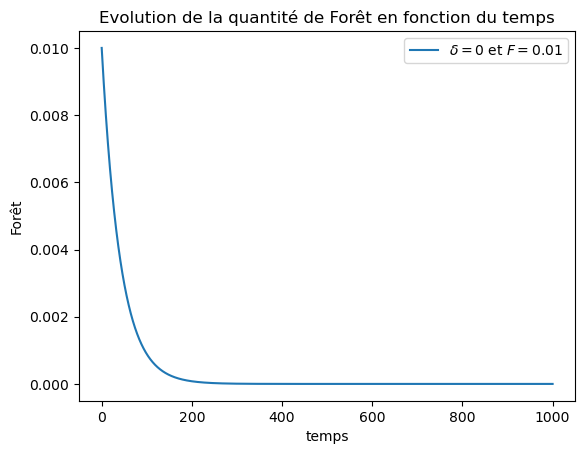

In [183]:
u02 = np.array([10,0.01])

sol_cas2 = RK4(fsysteme,time,u02, delta)

plt.plot(sol_cas2[:,0], sol_cas2[:,1], color = "r", label="$\delta = 0$ et $F0 = 0.01$")

plt.xlabel("Humus")
plt.ylabel("Forêt")
plt.title("Evolution de la Forêt en fonction de la quantité de humus")
plt.legend()
plt.show()

plt.plot(time, sol_cas2[:,0], label="$\delta = 0$ et $F = 0.01$")
plt.xlabel("temps")
plt.ylabel("Humus")
plt.title("Evolution de la quantité de Humus en fonction du temps")
plt.legend()
plt.show()


plt.plot(time, sol_cas2[:,1], label="$\delta = 0$ et $F = 0.01$")
plt.xlabel("temps")
plt.ylabel("Forêt")
plt.title("Evolution de la quantité de Forêt en fonction du temps")
plt.legend()
plt.show()


#### Cas 3 : $\delta = 0.2 $ et $F = 0$

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\2492664276.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(sol_cas3[:,0], sol_cas3[:,1], color = "r", label="$\delta = 0.2$ et $F = 0$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\2492664276.py:12: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas3[:,0], label="$\delta = 0.2$ et $F = 0$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\2492664276.py:20: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas3[:,1], label="$\delta = 0.2$ et $F = 0$")


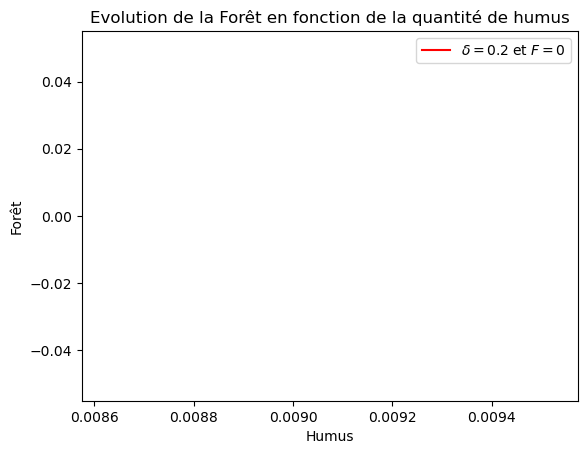

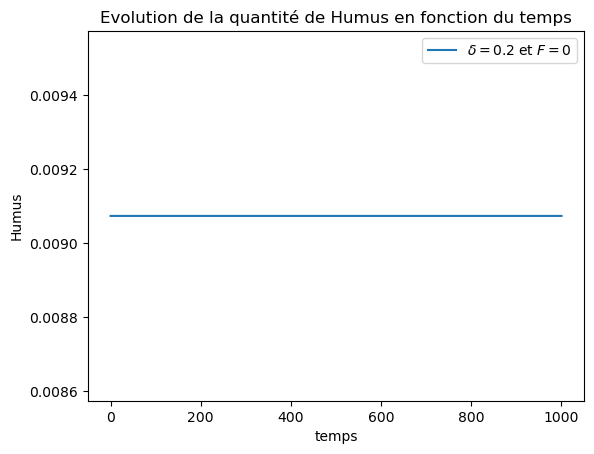

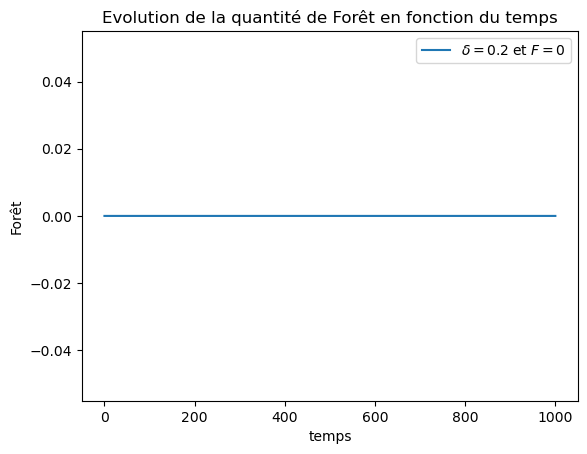

In [185]:
delta2 = 0.2 #biomasse crée par la terre mais qui vient pas des feuilles mortes
u03 = np.array([H0,0])
sol_cas3 = RK4(fsysteme,time,u03, delta2)

plt.plot(sol_cas3[:,0], sol_cas3[:,1], color = "r", label="$\delta = 0.2$ et $F = 0$")
plt.xlabel("Humus")
plt.ylabel("Forêt")
plt.title("Evolution de la Forêt en fonction de la quantité de humus")
plt.legend()
plt.show()

plt.plot(time, sol_cas3[:,0], label="$\delta = 0.2$ et $F = 0$")
plt.xlabel("temps")
plt.ylabel("Humus")
plt.title("Evolution de la quantité de Humus en fonction du temps")
plt.legend()
plt.show()


plt.plot(time, sol_cas3[:,1], label="$\delta = 0.2$ et $F = 0$")
plt.xlabel("temps")
plt.ylabel("Forêt")
plt.title("Evolution de la quantité de Forêt en fonction du temps")
plt.legend()
plt.show()

#### Cas 4 : $\delta = 0.2 $ et $F = 0.01$

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\1666285124.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(sol_cas4[:,0], sol_cas4[:,1], color = "r", label="$\delta = 0.2$ et $F = 0.01$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\1666285124.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas4[:,0], label="$\delta = 0.2$ et $F = 0.01$")
C:\Users\pavut\AppData\Local\Temp\ipykernel_10684\1666285124.py:19: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(time, sol_cas4[:,1], label="$\delta = 0.2$ et $F = 0.01$")


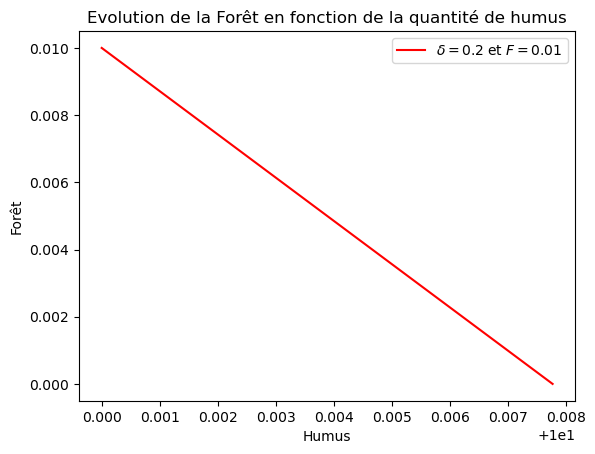

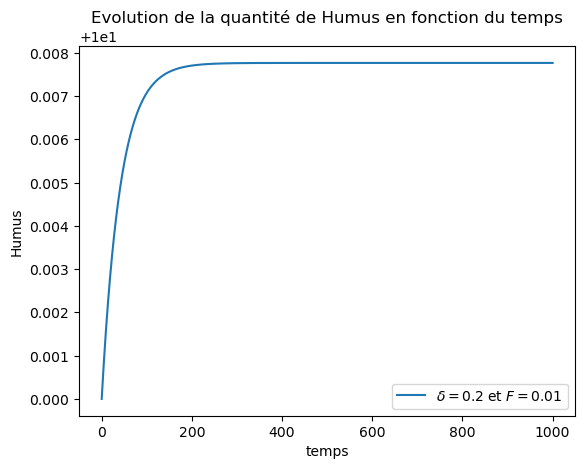

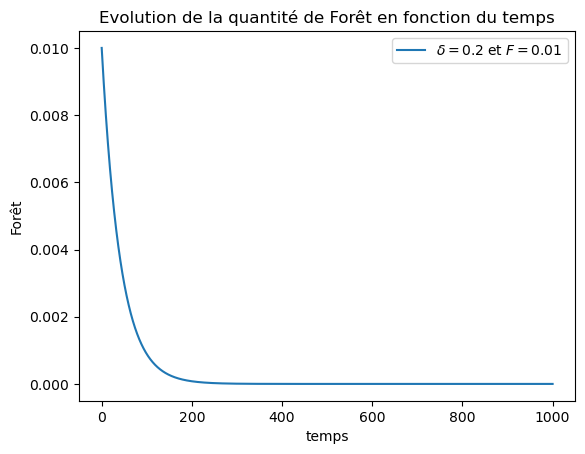

In [187]:
u04 = np.array([H0,0.01])
sol_cas4 = RK4(fsysteme,time,u02, delta2)

plt.plot(sol_cas4[:,0], sol_cas4[:,1], color = "r", label="$\delta = 0.2$ et $F = 0.01$")
plt.xlabel("Humus")
plt.ylabel("Forêt")
plt.title("Evolution de la Forêt en fonction de la quantité de humus")
plt.legend()
plt.show()

plt.plot(time, sol_cas4[:,0], label="$\delta = 0.2$ et $F = 0.01$")
plt.xlabel("temps")
plt.ylabel("Humus")
plt.title("Evolution de la quantité de Humus en fonction du temps")
plt.legend()
plt.show()


plt.plot(time, sol_cas4[:,1], label="$\delta = 0.2$ et $F = 0.01$")
plt.xlabel("temps")
plt.ylabel("Forêt")
plt.title("Evolution de la quantité de Forêt en fonction du temps")
plt.legend()
plt.show()